In [1]:
from google.colab import files
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os, signal, zipfile, random

print(tf.__version__)

2.8.2


In [9]:
# Provide the Data

# case 1: 猜函数y=2x-1
# xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
# ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)


# # case 2: 给服装图片28*28*1（黑白图片），猜是属于哪个服装分类(10个)
# # step 1, load data from fashion_mnist
# fmnist = tf.keras.datasets.fashion_mnist
# (training_images, training_labels), (test_images, test_labels) = fmnist.load_data()
# # (optional) step 2: see hoe the dataset look like
# # index = 130
# # np.set_printoptions(linewidth=320)
# # print(f'LABEL: {training_labels[index]}')
# # print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}') # 打出training_image的每个pixel的数值
# # plt.imshow(training_images[index])  # 打出图片
# # step 3: Normalize the pixel values of the train and test images
# training_images, test_images  = training_images / 255.0, test_images / 255.0


# case 3: 给更高像素的一堆彩色图片，猜是人是马（binary问题）
# download the data from the link
# !wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
# !wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

# # unzip the data
# local_zip = './horse-or-human.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('./horse-or-human')
# local_zip = './validation-horse-or-human.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('./validation-horse-or-human')
# zip_ref.close()
train_horse_dir = os.path.join('./horse-or-human/horses')
train_human_dir = os.path.join('./horse-or-human/humans')
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)
print('total training horse images:', len(train_horse_names))
print('total training human images:', len(train_human_names))

# # (optional) see how the source data being like
# nrows, ncols, pic_start_index, num_each = 4, 4, 0, 8
# fig = plt.gcf()
# fig.set_size_inches(ncols * 4, nrows * 4)
# next_horse_pix = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_start_index:pic_start_index+num_each]]
# next_human_pix = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_start_index:pic_start_index+num_each]]
# for i, img_path in enumerate(next_horse_pix+next_human_pix):
# 	sp = plt.subplot(nrows, ncols, i + 1) # Set up subplot; subplot indices start at 1
# 	sp.axis('Off') # Don't show axes (or gridlines)
# 	img = mpimg.imread(img_path)
# 	print(img.shape)
# 	plt.imshow(img)
# plt.show()

# label according to the folder name
train_generator = ImageDataGenerator(rescale=1/255).flow_from_directory(
'./horse-or-human/',    # source directory for training images
target_size=(300, 300),  # all images will be resized to 300x300
batch_size=128,
class_mode='binary')
validation_generator = ImageDataGenerator(rescale=1/255).flow_from_directory(
'./validation-horse-or-human/',  # source directory for validation images
target_size=(300, 300),  # all images will be resized to 300x300
batch_size=32,
class_mode='binary')



--2022-10-09 20:22:17--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.2’

horse-or-human.zip. 100%[===================>] 142.65M   277MB/s    in 0.5s    

2022-10-09 20:22:18 (277 MB/s) - ‘horse-or-human.zip.2’ saved [149574867/149574867]

--2022-10-09 20:22:18--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (1

In [3]:
# Define a model

# # case 1: 猜函数y=2x-1
# # Dense: densely(密集) connected NN layer
# # 1 layer， units=1 -> 1 neuro in this layer
# model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])


# # case 2: 给服装图片，猜是属于哪个服装分类
# # 一个Dense就是神经网络里的一层
# #   输入层不用activation（激活函数：将每层的输入经过非线性函数变换变成另一层的数据）
# #   隐藏层和输入层一般都需要activation。假如都不用activation，则整个神经网络就是一个线性方程
# # relu = x if x>0 else 0
# # softmax 是将所有输入的数字 同比例缩小或者放大，使得他们的总和为1(这样可以用作probability)
# model = keras.models.Sequential([
# keras.layers.Flatten(),  # input 28x28 pixel matrix, output a 1-dimensional array.
# keras.layers.Dense(128, activation=tf.nn.relu), # 128个neurons, relu = x if x>0 else 0
# keras.layers.Dense(10, activation=tf.nn.softmax) # 输出层有10个neurons因为最后out要定的label只有10个选择
# ])

# # with conv2d (filter滤镜) 和 Pooling (压缩图片)
# model = tf.keras.models.Sequential([                                                  
#   # Add convolutions and max pooling
#   tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
#   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
#   tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
#   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
#   # Add the same layers as before
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])
# model.summary()


# case 3: 给更高像素的一堆彩色图片，猜是人是马（binary问题）
model = tf.keras.models.Sequential([ 
# 1st convolution, input shape is 300x300 with 3 bytes color    
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),  # 2nd convolution
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'), # 3rd convolution
tf.keras.layers.MaxPooling2D(2,2),    
tf.keras.layers.Conv2D(64, (3,3), activation='relu'), # 4th convolution
tf.keras.layers.MaxPooling2D(2,2),    
tf.keras.layers.Conv2D(64, (3,3), activation='relu'), # 5th convolution
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(), # Flatten the results to feed into a DNN
tf.keras.layers.Dense(512, activation='relu'), # 512 neuron hidden layer
tf.keras.layers.Dense(1, activation='sigmoid')  # 1 neuron sigmoid best for binary. 0 -> horses, 1 -> humans
])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [4]:
# Compile the model
# 1, optimizer: Generates a new and improved guess to decrease loss
# 2, loss function

# case 1: 猜函数y=2x-1
#   sgd: Stochastic Gradient Descent
# model.compile(optimizer='sgd', loss='mean_squared_error')


# # case 2: 给服装图片，猜是属于哪个服装分类
# model.compile(optimizer = tf.optimizers.Adam(),
#               loss = 'sparse_categorical_crossentropy',
#               metrics=['accuracy'])


# case 3: 给更高像素的一堆彩色图片，猜是人是马（binary问题）
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate=0.001),
loss = 'binary_crossentropy',
metrics=['accuracy'])

In [5]:
# Train the model

# case 1: 猜函数y=2x-1
# model.fit(xs, ys, epochs=500)


# # case 2: 给服装图片，猜是属于哪个服装分类
# model.fit(training_images, training_labels, epochs=5)

# case 3: 给更高像素的一堆彩色图片，猜是人是马（binary问题）
# history = model.fit(train_generator, steps_per_epoch=8, epochs=15, verbose=1)
history = model.fit(train_generator, steps_per_epoch=8, epochs=15, 
validation_data=validation_generator, validation_steps=8,
verbose=2)


Epoch 1/15
8/8 - 20s - loss: 1.0970 - accuracy: 0.4972 - val_loss: 0.6674 - val_accuracy: 0.7734 - 20s/epoch - 3s/step
Epoch 2/15
8/8 - 7s - loss: 0.6840 - accuracy: 0.5929 - val_loss: 0.6275 - val_accuracy: 0.8672 - 7s/epoch - 925ms/step
Epoch 3/15
8/8 - 8s - loss: 0.7687 - accuracy: 0.6953 - val_loss: 0.6213 - val_accuracy: 0.5078 - 8s/epoch - 988ms/step
Epoch 4/15
8/8 - 7s - loss: 0.6348 - accuracy: 0.6396 - val_loss: 0.9874 - val_accuracy: 0.6172 - 7s/epoch - 936ms/step
Epoch 5/15
8/8 - 8s - loss: 1.4247 - accuracy: 0.7686 - val_loss: 2.0785 - val_accuracy: 0.5703 - 8s/epoch - 939ms/step
Epoch 6/15
8/8 - 7s - loss: 0.2637 - accuracy: 0.8843 - val_loss: 3.0605 - val_accuracy: 0.5547 - 7s/epoch - 919ms/step
Epoch 7/15
8/8 - 8s - loss: 0.4441 - accuracy: 0.8525 - val_loss: 1.4835 - val_accuracy: 0.7539 - 8s/epoch - 960ms/step
Epoch 8/15
8/8 - 7s - loss: 0.1338 - accuracy: 0.9410 - val_loss: 0.9333 - val_accuracy: 0.8398 - 7s/epoch - 931ms/step
Epoch 9/15
8/8 - 7s - loss: 0.1405 - accu

In [6]:
# Make a prediction

# case 1: 猜函数y=2x-1
# print(model.predict([10.0]))


# # case 2: 给服装图片，猜是属于哪个服装分类
# # (optional step) evaluate the data using the test dataset
# model.evaluate(test_images, test_labels)
# classifications = model.predict(test_images)
# print(classifications[3])
# print(test_labels[3])


# case 3: 给更高像素的一堆彩色图片，猜是人是马（binary问题）
uploaded = files.upload()
for filename in uploaded.keys():
	img = image.load_img('/content/' + filename, target_size=(300, 300))
	x = np.expand_dims(image.img_to_array(img)/255, axis=0)
	test_image = np.vstack([x])
	classes = model.predict(test_image, batch_size=10)
	print(classes[0])
	print(filename + ' is human ') if classes[0] > 0.5 else print(filename + ' is horse')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


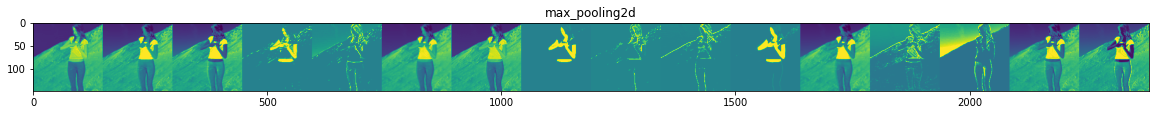

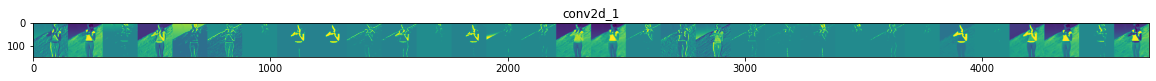

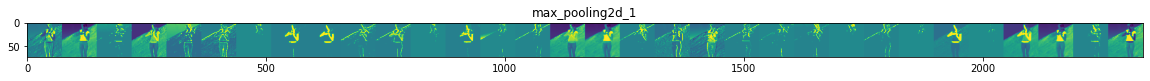

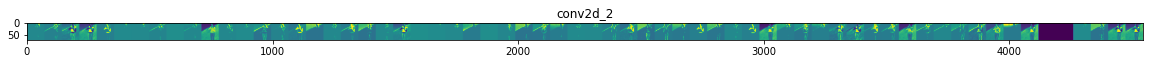

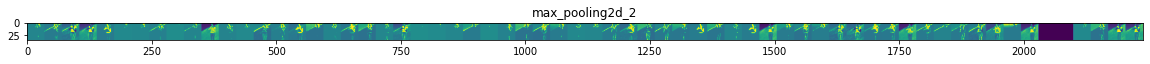

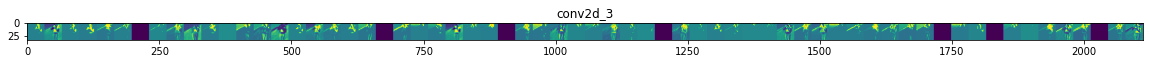

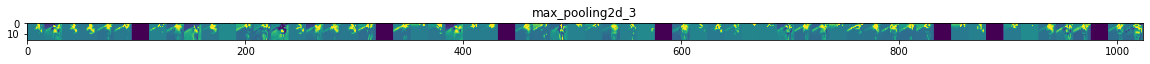

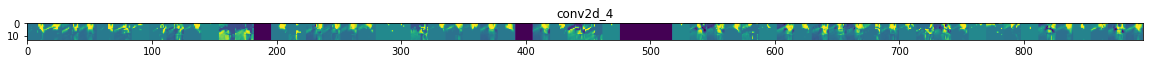

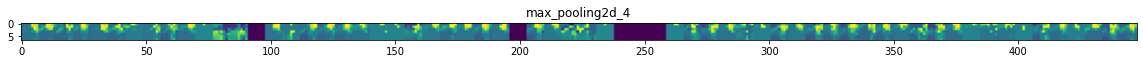

In [10]:
# case 3: 给更高像素的一堆彩色图片，猜是人是马（binary问题）
# (optional) 可视化convolution的过程
# 定义可视化model
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
layer_names = [layer.name for layer in model.layers[1:]]
# 随机选一个path来可视化
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
# 跑model.predict
x = img_to_array(load_img(img_path, target_size=(300, 300)))/255 # shape (300, 300, 3), Scale by 1/255
x = x.reshape((1,) + x.shape) # reshape to (1, 300, 300, 3)
successive_feature_maps = visualization_model.predict(x)
# 可视化
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
	if len(feature_map.shape) == 4:
		n_features = feature_map.shape[-1]
		size = feature_map.shape[1]
		display_grid = np.zeros((size, size * n_features))
		for i in range(n_features):
			x = feature_map[0, :, :, i]
			x -= x.mean()
			x /= x.std()
			x *= 64
			x += 128
			x = np.clip(x, 0, 255).astype('uint8')
			display_grid[:, i * size : (i + 1) * size] = x
		# Display the grid
		scale = 20. / n_features
		plt.figure(figsize=(scale * n_features, scale))
		plt.title(layer_name)
		plt.grid(False)
		plt.imshow(display_grid, aspect='auto', cmap='viridis')